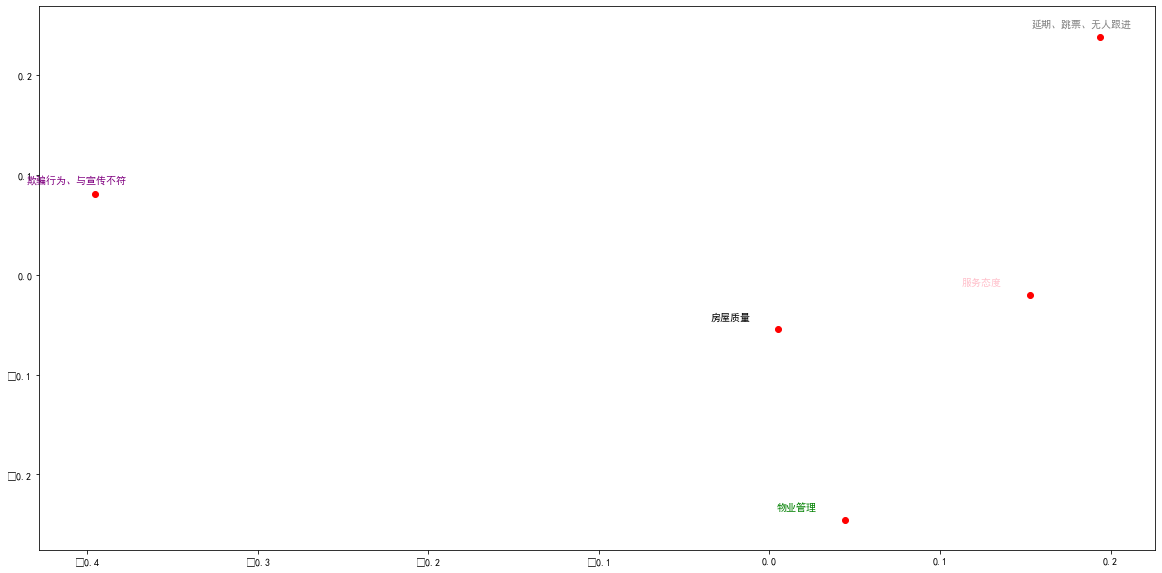

[[0.         0.23963139 0.36169637 0.35321264 0.4268879 ]
 [0.23963139 0.         0.24543323 0.28584766 0.36887572]
 [0.36169637 0.24543323 0.         0.34131783 0.38454815]
 [0.35321264 0.28584766 0.34131783 0.         0.38481715]
 [0.4268879  0.36887572 0.38454815 0.38481715 0.        ]]


<Figure size 432x288 with 0 Axes>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']

#计算余弦相似度
def cos_similarity(vector_a, vector_b):
    vector_a = np.mat(vector_a)
    vector_b = np.mat(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num/denom
    sim = 0.5 + 0.5*cos
    return sim

def data_similarity(data_path):
    data = pd.read_excel(data_path, encoding="utf8")
    data1 = np.array(data["延期、跳票、无人跟进"])
    data2 = np.array(data["服务态度"])
    data3 = np.array(data["物业管理"])
    data4 = np.array(data["房屋质量"])
    data5 = np.array(data["欺骗行为、与宣传不符"])
    cos_map = []
    for array_i in [data1, data2, data3, data4, data5]:
        col_map = []
        for array_j in [data1, data2, data3, data4, data5]:
            if np.array_equal(array_i, array_j):
                col_map.append(1)
            else:
                col_map.append(cos_similarity(array_i, array_j))
        cos_map.append(col_map)
    return cos_map

class MyMDS:
    def __init__(self,n_components):
        self.n_components=n_components
    
    def fit(self,data):
        m,n=data.shape
        dist=np.zeros((m,m))
        disti=np.zeros(m)
        distj=np.zeros(m)
        B=np.zeros((m,m))
        for i in range(m):
            dist[i]=np.sum(np.square(data[i]-data),axis=1).reshape(1,m)
        for i in range(m):
            disti[i]=np.mean(dist[i,:])
            distj[i]=np.mean(dist[:,i])
        distij=np.mean(dist)
        for i in range(m):
            for j in range(m):
                B[i,j] = -0.5*(dist[i,j] - disti[i] - distj[j] + distij)
        lamda,V=np.linalg.eigh(B)
        index=np.argsort(-lamda)[:self.n_components]
        diag_lamda=np.sqrt(np.diag(-np.sort(-lamda)[:self.n_components]))
        V_selected=V[:,index]
        Z=V_selected.dot(diag_lamda)
        return Z
MDS = MyMDS(2)
final_data = np.mat(np.ones([5, 5]))-np.mat(data_similarity(r"D:\工作文件\语料\客户投诉问题分类.xlsx"))
fit_data = MDS.fit(final_data)
fig = plt.figure(figsize=[20, 10])
plt.scatter(fit_data[:,0],fit_data[:,1],color="red")
labels = ["延期、跳票、无人跟进", "服务态度", "物业管理", "房屋质量", "欺骗行为、与宣传不符"]
colors = ['gray', 'pink', 'green', 'black', 'purple']
for i in range(5):
    plt.annotate(labels[i], xy=(fit_data[i, 0], fit_data[i, 1]), xytext=(fit_data[i, 0]-0.04, fit_data[i, 1]+0.01), color = colors[i])
plt.show()
plt.savefig(r"D:\工作文件\语料\MDS.png")
#print(final_data)